## 1. 임베딩이란
- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터(vector)로 바꾼 결과 혹은 그 일련의 과정 전체
- 단어나 문장을 벡터로 변환해 벡터 공간으로 '끼워 넣는다(embed)'는 의미의 임베딩
## 2. 임베딩의 역할
1. 단어/ 문장 간 관련도 계산
- 단어를 벡터로 임베딩 하는 순간 벡터들 사이의 유사도를 계산하는 일이 가능해짐
- 자연어일 때는 불가능했던 코사인 유사도 계산이 임베딩 덕분에 가능해짐
- 임베딩을 수행하면 벡터 공간을 기하학적으로 나타낸 시각화 역시 가능해짐
2. 의미적/ 문법적 정보 함축
- 단어 벡터 간 덧셈/ 뺄셈을 통해 단어들 사이의 의미적, 문법적 관계를 도출
- 단어 유추 평가 : 단어 임베딩을 평가하는 방법
3. 전이 학습
- 임베딩을 다른 딥러닝 모델의 입력값으로 쓰는 기법
- 전이 학습 모델은 대규모 말뭉치를 활용해 임베딩을 미리 만들어 놓음(의미적, 문법적 정보 등이 있음)
- 이 임베딩을 입력값으로 쓰는 전이 학습 모델은 문서 분류 태스크를 빠르게 할 수 있음
## 3. 임베딩 기법의 역사와 종류
**1. 통계 기반에서 뉴럴 네트워크 기반으로**
- 초기 임베딩 기법은 대부분 말뭉치의 통계량을 직접적으로 활용하는 경향이 있음
#### 통계 기법
###### 잠재 의미 분석(Latent Semantic Analysis)
- 대표적인 초기 임베딩 기법
- 특이값 분해 : 수학적 비법을 적용해 행렬에 속한 벡터들의 차원을 축소하는 방법
- 수행 대상 행렬 : TF-IDF 행렬, 단어-문맥 행렬, 점별 상호 정보량 행렬
#### 뉴럴 네트워크(Neural Network)
- 이전 단어들이 주어졌을 때 다음 단어가 뭐가 될지 예측하거나, 문장 내 일부분에 구멍을 뚫어 놓고 해당 단어가 무엇일지 맞추는 과정에서 학습됨
- 구조가 유연하고 표현력이 풍부하기 때문에 자연어의 무한한 문맥을 상당 부분 학습 가능
<br>

**2. 단어 수준에서 문장 수준으로**
#### 단어 임베딩 기법
- 각각의 벡터에 해당 단어의 문맥적 의미를 함축함
- 단점 : 동음이의어를 분간하기 어려움(단어 형태가 같으면 동일한 단어로 보고, 단어 벡터에 적용시킴)
#### 문장 수준 임베딩 기법
- 개별 단어가 아닌 단어 시퀀스 전체의 문맥적 의미를 함축하기 때문에 단어 임베딩 기법보다 전이 학습 효과가 좋음
- 동음이의어 분리 가능
<br>
**3. 룰 -> 엔드투엔드 -> 프리트레인/파인 튜닝(ELMo, GPT, BERT 등)**
- 1990년대까지 자연어 처리 모델 대부분은 사람이 피쳐(모델의 입력값)를 직접 뽑음
    - 언어의 규칙을 모델에 알려주는 방식
- 엔드투엔드(end-to-end model) : 데이터를 통째로 모델에 넣고 입출력 사이의 관계를 사람의 개입 없이 모델 스스로 처음부터 끝까지 이해하도록 유도
    - ex. 시퀀스투시퀀스(sequence-to-sequence)
- 대규모 말뭉치로 임베딩을 만듬(프리트레인)->임베딩을 입력으로 하는 새로운 모델을 만들고 구체적 문제에 맞는 소규모 데이터에 맞게 모델 전체를 업데이트(파인 튜닝/전이학습)
<br>

**윗 물(upstream task)이 맑아야 아랫물(downstream task)이 맑다[임베딩 품질이 좋아야 문제를 제대로 풀 수 있다]**
- 다운스트림 태스크(downstream task) : 자연어 처리의 구체적 문제
    - 품사 판별, 개체명 인식, 의미역 분석
- 업스트림 태스크(upstream task) : 다운스트림 태스크에 앞서 해겨랳야 할 과제
    - 단어/문장 임베딩을 프리트레인하는 과정

## 4. 임베딩의 종류와 성능
#### 행렬 분해 기반 방법
- 말뭉치 정보가 들어 있는 원래 행렬을 두 개이상의 작은 행렬로 쪼개는 방식의 임베딩 기법
- 분해한 이후엔 둘 중 하나의 행렬만 쓰거나, 둘을 더하거나 이어 붙여 임베딩으로 사용함
#### 예측 기반 방법
- 어떤 단어 주변에 특정 단어가 나타날지 예측하거나, 이전 단어들이 주어졌을 때 다음 단어가 무엇일지 예측하거나, 문장 내 일부 단어를 지우고 해당 단어가 무어일지 맞추는 과정에서 학습하는 방법
#### 토빅 기반 방법
- 주어진 문서에 잠재된 주제를 추론하는 방식으로 임베딩을 수행
- LDA같은 모델은 학습이 완료되면 각 문서가 어떤 주제 분포를 갖는지 확률 벡터 형태로 반환하기 때문에 임베딩 기법의 일종으로 이해할 수 있음
#### 임베딩 성능 평가
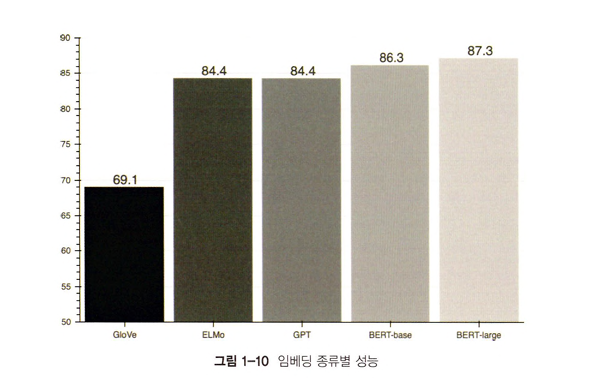

### 임베딩
1. 단어/문장 간 관련도 계산
    - 단어를 벡터로 임베딩하는 순간 단어 벡터 사이의 유사도(similarity)를 계산하는 일이 가능
    - 예. L1 distane, L2 distance, cosine similarity
2. 의미/문법 정보 함축
    - 임베딩은 벡터인 만큼 사칙연산이 가능
    - 단어간 덧셈/뺄셈을 통해 단어사이의 의미적, 문법적 관계를 도출
3. 전이학습
    - 임베딩을 다른 딥러닝 모델의 입력값으로 쓴다
    - HOW?
        - 대규모 말뭉치를 활용해 임베딩을 미리 만들어 놓음
        - 임베딩에는 의미적, 문법적 정보들이 녹아있음
        - pre-reain/fine tuning
    - 임베딩이 중요한 이유
        - 임베딩의 품질이 좋으면 수행하려는 task의 성능이 올라감
        - 임베딩의 품질이 좋으면 모델의 수렴(converge)가 빨라짐
#### 임베딩의 역사와 종류
- \* 역사
- 통계 기반 --> 뉴렬 네트워크 기반
    - Latent Semantic Analysis, LSA
    - 단어 사용 빈도 등 말뭉치를 통계량 정보가 들어 있는 커다란 행렬에 특이값 분해등 수학적 기법을 적용해 행렬에 속한 벡터들의 차원을 축소
    - 뉴럴 네트워크
    - 이전 단어들이 주어졌을때 다음 단어가 뭐가 될지 예측, 문장내 일부분에 구멍을 뚫어놓고 뭐가 들어갈지(masking)
- 단어 수준 --> 문장 수준
    - 단어 수준 임베딜 (NLPM, Word2Vec, GloVe,...)
        - 단점 : 동음이의어 분간 어려움
    - 문장 수준 임베딩 (ELmo, BERT, GPT,...)
        - 개별 단어가 아닌 시퀀스 전체, 동음이의어 분간 가능
- 룰 --> 엔드 투 엔드 --> 프리 트레인/파인 튜닝
    - ’90년대 : 사람이 피쳐를 뽑음
    - ’00중반 이후 : 딥러닝 모델이 주목받기 시작
        - end-to-end: 데이터를 통체로 넣고 입출력간 관계를 사람의 개입없이
    - ’18이후 : pre-train/fine tuning
        - pre-train : 우선 대규모 말뭉치로 임베딩 만듦
        - fine tuning : 임베딩을 입력으로 하는 새로운 딥러닝 모델을 만들고 우리가 풀고 싶은 구체적 문제에 맞는 소규모 데이터에 맞게 임베딩을 포함한 모델 전체를 업데이트
    - downstream task : 우리가 풀고 싶은 자연어 처리의 구체적 문제들
    - upstream task
- \* 종류와 성능
    - 행렬분해 : 원래 행렬을 2개 이상의 작은 행렬로 분해 후 둘 중 하나의 행렬만 쓰거나 sum하거나 concat하여 사용
    - 예측
    - 토픽기반 :
    - 성능평가 : 다운스트림 태스크에 대한 임베딩 종류별 성능 분석
        - 임베딩 품질이 각종 다운스크림 태스크 성능에 크게 영향을 준다